In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json


In [7]:
def build_dataframe(data, seed_list): 
    df_list = []
    for seed in seed_list:
        records = {}
        data_view = data[seed]
        for key in data_view.keys():
            n = key.split("_")[1]
            if len(n) > 3: continue # skip abs metric
            entry = {"mean_episode_returns": data_view[key]["mean_episode_returns"][0]}
            records[int(n)] = entry
        df = pd.DataFrame.from_dict(records, orient="index")
        df_list.append(df)

    df = pd.concat(df_list, axis=1)
    df.columns = seed_list
    df = df.apply

    return df

In [10]:
root = f"../results/ppo_ex1/"
paths = ['env1', 'env4', 'env16']
seed_list = ["seed_41", "seed_42", "seed_43"]
data_list = []
for path in paths:
    with open(root + path + "/metrics.json", "r") as f:
        raw_data = json.load(f)
        data = build_dataframe(raw_data["CartPole-v1"]['PPO'], seed_list)
        # print(data.head())
        data_list.append(data)

# print(data_list[0].head())

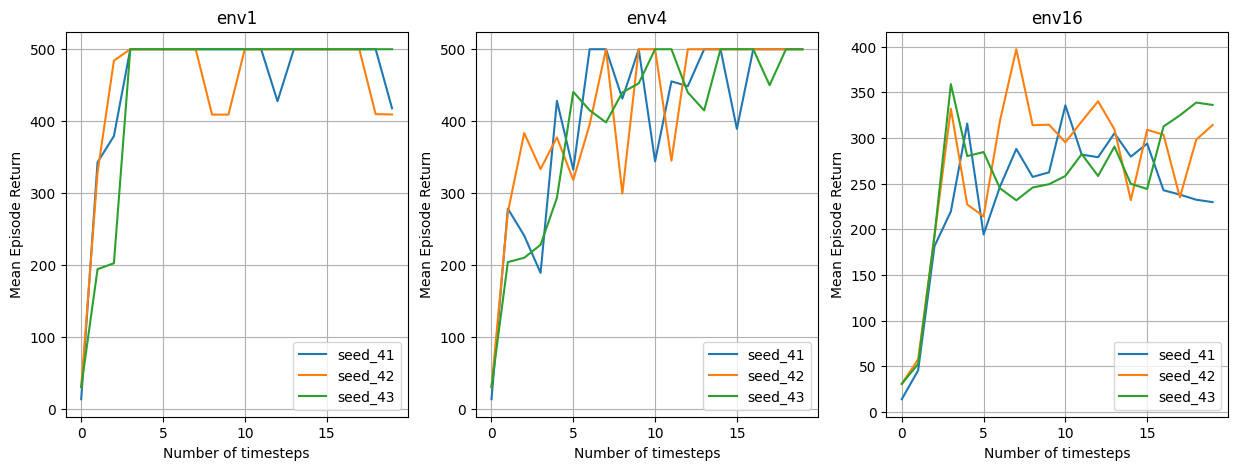

In [11]:

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, data in enumerate(data_list):
    data.plot(ax=ax[i])
    ax[i].set_title(paths[i])
    ax[i].set_xlabel("Number of timesteps")
    ax[i].set_ylabel("Mean Episode Return")
    ax[i].grid()